In [1]:
import requests
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
price_url = 'https://terminal.bytetree.com/data/bitcoin/flows-price.json'
fund_flow_url = 'https://terminal.bytetree.com/data/bitcoin/fund-total.json'

In [3]:
price = requests.get(price_url).json()
fund_flow = requests.get(fund_flow_url).json()

In [4]:
price_df = pd.DataFrame(price)
price_df.index = pd.to_datetime(price_df['date'])

fund_flow_df = pd.DataFrame(fund_flow)
fund_flow_df.index = pd.to_datetime(fund_flow_df['date'])

In [5]:
merge_df = pd.merge(price_df.value, fund_flow_df.value, left_index=True, right_index=True, suffixes=('_price', '_fund_flow'))

In [6]:
merge_df.tail()

,value_price,value_fund_flow
date,,
2023-12-26,42517.32,889139
2023-12-27,43469.34,889858
2023-12-28,42588.94,890761
2023-12-29,42073.59,890938
2024-01-01,44197.61,892699


Text(0.5, 1.0, 'Bitcoin Price and Fund Flow (2022)')

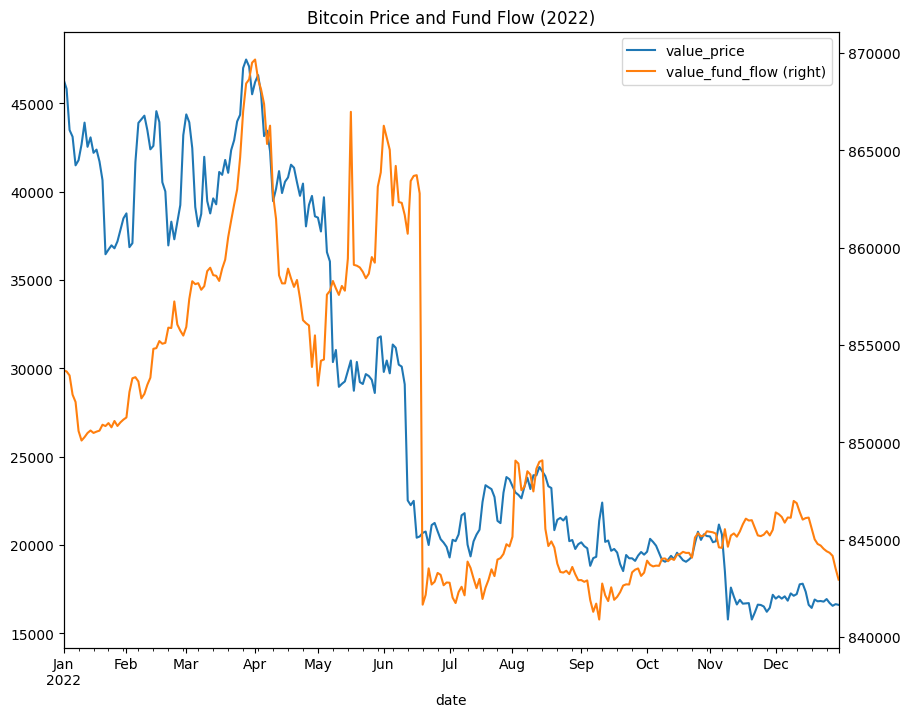

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
merge_df.loc['2022-01-01': '2023-01-01'].plot(y='value_price', ax=ax) 
merge_df.loc['2022-01-01': '2023-01-01'].plot(y='value_fund_flow', ax=ax, secondary_y=True) 
ax.set_title('Bitcoin Price and Fund Flow (2022)')


Text(0.5, 1.0, 'Bitcoin Price and Fund Flow (YTD)')

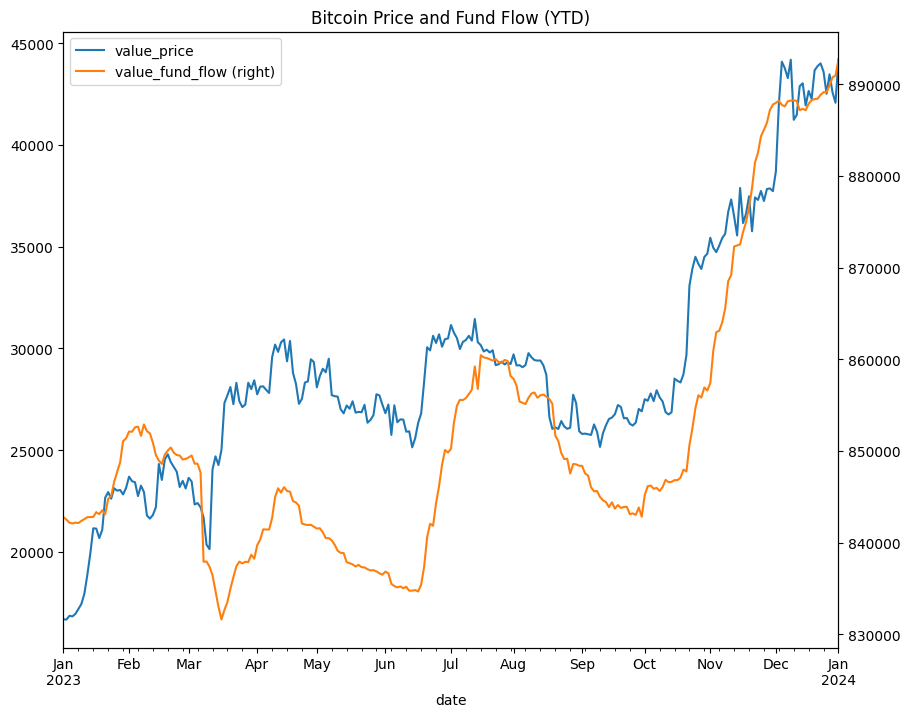

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
merge_df.loc['2023-01-01': ].plot(y='value_price', ax=ax) 
merge_df.loc['2023-01-01': ].plot(y='value_fund_flow', ax=ax, secondary_y=True) 
ax.set_title('Bitcoin Price and Fund Flow (YTD)')
